In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e26/sample_submission.csv
/kaggle/input/playground-series-s3e26/train.csv
/kaggle/input/playground-series-s3e26/test.csv


# Multi-Class Prediction of Cirrhosis Outcomes
Bu projede sirozlu hastaların bazı değerlerini tahmin etmek için çok sınıflı bir model geliştirilmektedir.<br><br>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTWbjgG5snU-nw7o-CleB2I3ABifduJxZgHzL7VZHNTNHW-q2gZpH-7wyaX3qMbl3iPoyU&usqp=CAU">

Projede kullanılan veriler [buradan](https://www.kaggle.com/competitions/playground-series-s3e26/data) temin edilmiştir.

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

train=pd.read_csv("/kaggle/input/playground-series-s3e26/train.csv")
test=pd.read_csv("/kaggle/input/playground-series-s3e26/test.csv")

df=pd.concat([train, test], axis=0)

df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [26]:
train.shape, test.shape

((7905, 20), (5271, 19))

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13176 entries, 0 to 5270
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             13176 non-null  int64  
 1   N_Days         13176 non-null  int64  
 2   Drug           13176 non-null  object 
 3   Age            13176 non-null  int64  
 4   Sex            13176 non-null  object 
 5   Ascites        13176 non-null  object 
 6   Hepatomegaly   13176 non-null  object 
 7   Spiders        13176 non-null  object 
 8   Edema          13176 non-null  object 
 9   Bilirubin      13176 non-null  float64
 10  Cholesterol    13176 non-null  float64
 11  Albumin        13176 non-null  float64
 12  Copper         13176 non-null  float64
 13  Alk_Phos       13176 non-null  float64
 14  SGOT           13176 non-null  float64
 15  Tryglicerides  13176 non-null  float64
 16  Platelets      13176 non-null  float64
 17  Prothrombin    13176 non-null  float64
 18  Stage       

<Axes: xlabel='Drug', ylabel='count'>

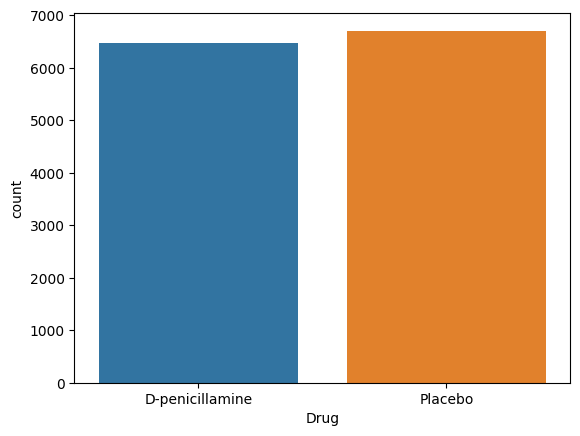

In [28]:
sns.countplot(x=df["Drug"])

In [29]:
df["Drug"]=np.where(df["Drug"]=="D-penicillamine", 1, 0)

In [30]:
df["Drug"].value_counts()

Drug
0    6704
1    6472
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

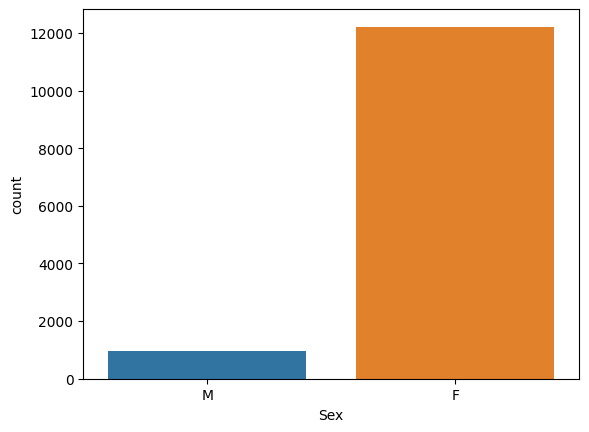

In [31]:
sns.countplot(x=df["Sex"])

In [32]:
df["Sex"]=np.where(df["Sex"]=="F", 1, 0)

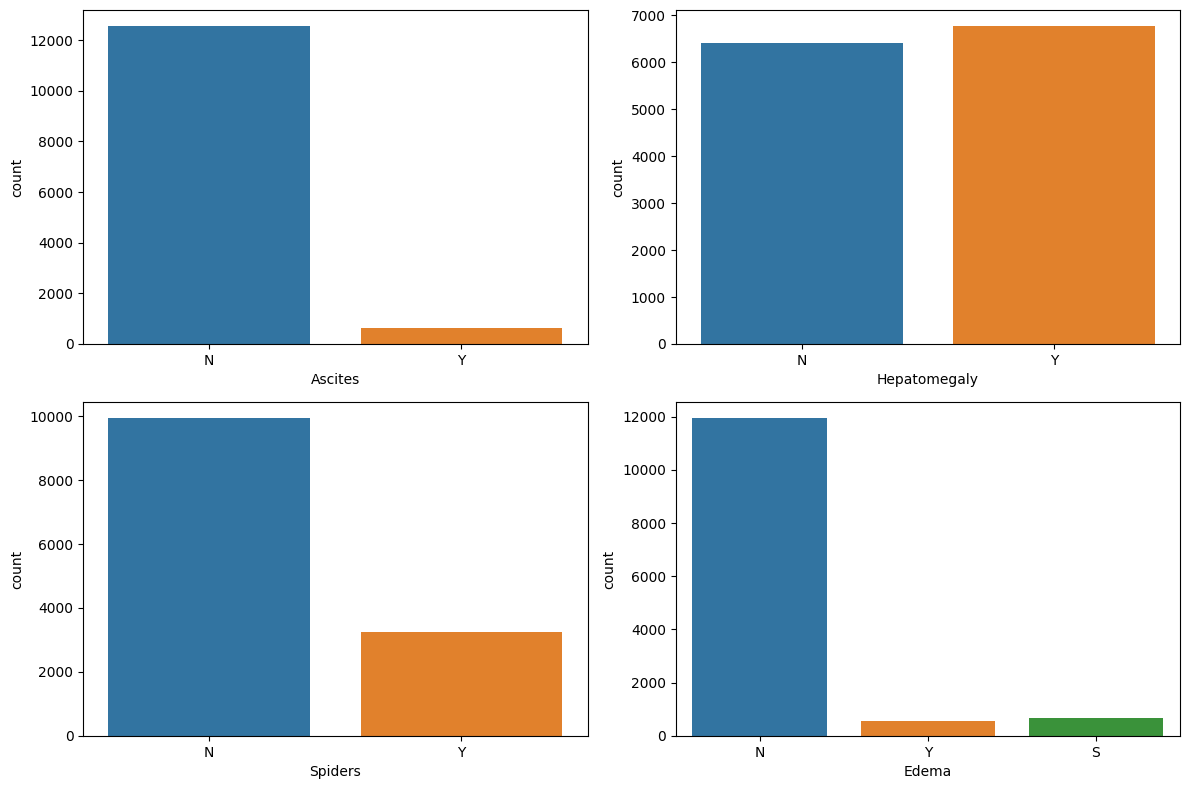

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

feature_names=["Ascites", "Hepatomegaly", "Spiders", "Edema"]
for i, ax in enumerate(axes.flat):
    sns.countplot(x=feature_names[i], data=df[feature_names], ax=ax)

plt.tight_layout()
plt.show()

In [34]:
df["Ascites"]=np.where(df["Ascites"]=="Y", 1, 0)
df["Hepatomegaly"]=np.where(df["Hepatomegaly"]=="Y", 1, 0)
df["Spiders"]=np.where(df["Spiders"]=="Y", 1, 0)
d={"N":0, "Y":1, "S":2}
df["Edema"]=df["Edema"].map(d)

<Axes: xlabel='Status', ylabel='count'>

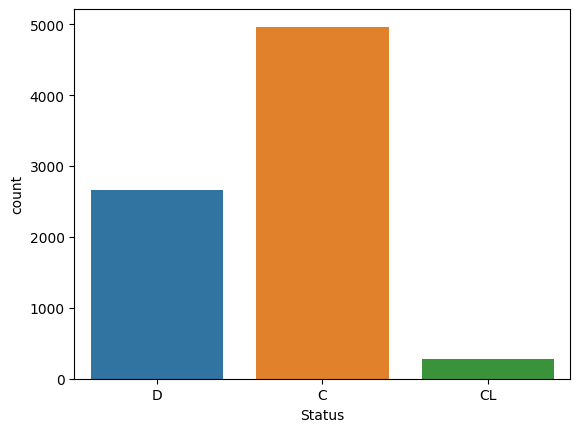

In [35]:
sns.countplot(x=df["Status"])

In [39]:
classes=["C","CL","D"]
d_class={"C":0,"CL":1,"D":2}
df["Status"]=df["Status"].map(d_class)
df["Status"] = df["Status"].fillna(-1).astype(int)

In [40]:
df["Status"].value_counts()

Status
-1    5271
 0    4965
 2    2665
 1     275
Name: count, dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13176 entries, 0 to 5270
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             13176 non-null  int64  
 1   N_Days         13176 non-null  int64  
 2   Drug           13176 non-null  int64  
 3   Age            13176 non-null  int64  
 4   Sex            13176 non-null  int64  
 5   Ascites        13176 non-null  int64  
 6   Hepatomegaly   13176 non-null  int64  
 7   Spiders        13176 non-null  int64  
 8   Edema          13176 non-null  int64  
 9   Bilirubin      13176 non-null  float64
 10  Cholesterol    13176 non-null  float64
 11  Albumin        13176 non-null  float64
 12  Copper         13176 non-null  float64
 13  Alk_Phos       13176 non-null  float64
 14  SGOT           13176 non-null  float64
 15  Tryglicerides  13176 non-null  float64
 16  Platelets      13176 non-null  float64
 17  Prothrombin    13176 non-null  float64
 18  Stage       

In [43]:
train=df.iloc[:7905]
test=df.iloc[7905:]

train.shape, test.shape

((7905, 20), (5271, 20))

# Modelleme

In [116]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

In [149]:
x=train.drop(["id", "Status"], axis=1)
y=train[["Status"]]

smote = SMOTE(random_state=42)
x, y = smote.fit_resample(x, y)

In [150]:
y["Status"].value_counts()

Status
2    4965
0    4965
1    4965
Name: count, dtype: int64

In [151]:
#y = np.eye(3)[y]
y = np.array(tf.keras.utils.to_categorical(y, num_classes=3))
y

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state = 42)
#y_train = np.squeeze(y_train, axis=1)
#y_test = np.squeeze(y_test, axis=1)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((10426, 18), (10426, 3), (4469, 18), (4469, 3))

In [153]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(18,)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [186]:
history=model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7535 - loss: 0.5859 - val_accuracy: 0.7800 - val_loss: 0.6107
Epoch 2/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7486 - loss: 0.5964 - val_accuracy: 0.8089 - val_loss: 0.5549
Epoch 3/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7562 - loss: 0.5840 - val_accuracy: 0.7838 - val_loss: 0.6050
Epoch 4/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7571 - loss: 0.5837 - val_accuracy: 0.7747 - val_loss: 0.6253
Epoch 5/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7481 - loss: 0.6002 - val_accuracy: 0.7962 - val_loss: 0.5890
Epoch 6/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7582 - loss: 0.5928 - val_accuracy: 0.7375 - val_loss: 0.7059
Epoch 7/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7560 - loss: 0.5860 - val_accuracy: 0.7749 - val_loss: 0.6325
Epoch 8/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7468 - loss: 0.5976 - val_accuracy: 0.

In [187]:
loss, accuracy = model.evaluate(x_test, y_test)
loss, accuracy

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8196 - loss: 0.5052


(0.5596097111701965, 0.8071156740188599)

In [170]:
xt=test[['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage']]
xt.shape

(5271, 18)

In [188]:
pred=model.predict(xt)

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [189]:
pred, pred.shape

(array([[0.845329  , 0.00547047, 0.14920051],
        [0.41653937, 0.4094279 , 0.17403269],
        [0.02246796, 0.13946794, 0.83806413],
        ...,
        [0.8452046 , 0.05034215, 0.10445327],
        [0.708848  , 0.2795968 , 0.01155524],
        [0.1399088 , 0.09540824, 0.76468307]], dtype=float32),
 (5271, 3))

In [190]:
test['Status_C'] = pred[:,0]
test['Status_CL'] = pred[:,1] 
test['Status_D'] = pred[:,2]

test.head()

/tmp/ipykernel_34/3158045951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Status_C'] = pred[:,0]
/tmp/ipykernel_34/3158045951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Status_CL'] = pred[:,1]
/tmp/ipykernel_34/3158045951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Status_C,Status_CL,Status_D
0,7905,3839,1,19724,1,0,1,0,0,1.2,...,1636.0,151.90,90.0,430.0,10.6,2.0,-1,0.845329,0.005470,0.149201
1,7906,2468,1,14975,1,0,0,0,0,1.1,...,1257.0,151.90,155.0,227.0,10.0,2.0,-1,0.416539,0.409428,0.174033
2,7907,51,0,13149,1,0,1,0,1,2.0,...,961.0,69.75,101.0,213.0,13.0,4.0,-1,0.022468,0.139468,0.838064
3,7908,2330,1,20510,1,0,0,0,0,0.6,...,554.0,125.55,56.0,270.0,10.6,2.0,-1,0.829699,0.010052,0.160250
4,7909,1615,1,21904,1,0,1,0,0,1.4,...,1110.0,125.00,126.0,221.0,9.8,1.0,-1,0.786991,0.065564,0.147445


In [191]:
test[["id", "Status_C", "Status_CL", "Status_D"]].to_csv("submission.csv", index=False)

## Sonuç

Geliştirilen model ile ilk denemede Kaggle Score: 0.90140 sonrakilerde en başarılı skor 0.60581 elde edildi. Yarışma 1.sinin skoru: 0.39104